<a href="https://colab.research.google.com/github/kimheeyoung1/bdna/blob/main/%EA%B9%80%ED%9D%AC%EC%98%8110%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.5 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=ae446cbeaaa82d3fbd3e339ba710dd1a23eb1de50eb861bdb08e4123c421c528
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import mglearn

In [3]:
import matplotlib

In [4]:
import numpy as np

In [5]:
import sklearn

In [6]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


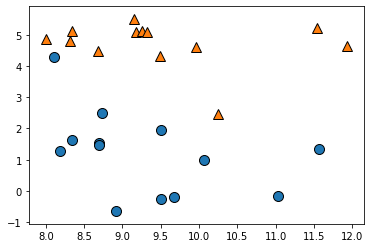

In [7]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


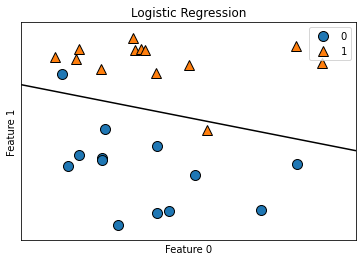

In [9]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1],y)
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5)
plt.title('Logistic Regression')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

In [10]:
print("score: {:.3f}".format(clf.score(X,y)))

score: 0.923


In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [12]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [13]:
cancer.data.shape

(569, 30)

In [14]:
cancer.target.shape

(569,)

In [15]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [19]:
logreg=LogisticRegression(max_iter=100000).fit(X_train,y_train)

In [20]:
print("Test Score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test Score: {:.3f}".format(logreg.score(X_test,y_test)))

Test Score: 0.958
Test Score: 0.958


In [21]:
logreg10000=LogisticRegression(C=10000,max_iter=100000).fit(X_train,y_train)
print("Test Score: {:.3f}".format(logreg10000.score(X_train,y_train)))
print("Test Score: {:.3f}".format(logreg10000.score(X_test,y_test)))

Test Score: 0.984
Test Score: 0.979


In [22]:
logreg1000=LogisticRegression(C=1000,max_iter=100000).fit(X_train,y_train)
print("Test Score: {:.3f}".format(logreg1000.score(X_train,y_train)))
print("Test Score: {:.3f}".format(logreg1000.score(X_test,y_test)))

Test Score: 0.986
Test Score: 0.986


In [23]:
logreg10=LogisticRegression(C=10,max_iter=100000).fit(X_train,y_train)
print("Test Score: {:.3f}".format(logreg10.score(X_train,y_train)))
print("Test Score: {:.3f}".format(logreg10.score(X_test,y_test)))

Test Score: 0.967
Test Score: 0.965


In [24]:
logreg100=LogisticRegression(C=100, max_iter=100000).fit(X_train,y_train)

In [25]:
logreg1=LogisticRegression(C=1, max_iter=100000).fit(X_train,y_train)

In [26]:
logreg0001=LogisticRegression(C=0.001, max_iter=100000).fit(X_train,y_train)

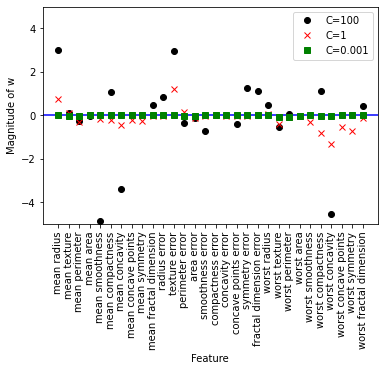

In [27]:
plt.plot(logreg100.coef_.T, 'ko', label='C=100')
plt.plot(logreg1.coef_.T, 'rx', label='C=1')
plt.plot(logreg0001.coef_.T, 'gs', label='C=0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1], 'b')
plt.xlim(xlims)
plt.ylim(-5,5)
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Magnitude of w')
plt.show()

In [28]:
lr_l1 = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=10000).fit(X_train,y_train)
print("Test Score: {:.3f}".format(lr_l1.score(X_train,y_train)))
print("Test Score: {:.3f}".format(lr_l1.score(X_test,y_test)))
print("Number of Features used: ", sum(sum(lr_l1.coef_!=0)))

Test Score: 0.960
Test Score: 0.958
Number of Features used:  10


In [29]:
!pip install markers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 5.4 MB/s 


In [30]:
import markers

Train accuracy of Logistic Regression with C: 0.001
Test accuracy of Logistic Regression with C: 0.001
Train accuracy of Logistic Regression with C: 1.000
Test accuracy of Logistic Regression with C: 1.000
Train accuracy of Logistic Regression with C: 100.000
Test accuracy of Logistic Regression with C: 100.000


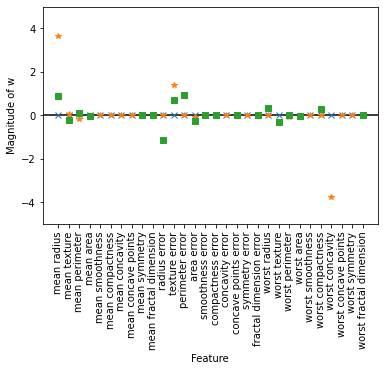

In [31]:
for C,marker in zip([0.001,1,100],['x','*','s']):
  lr_l1=LogisticRegression(C=C,penalty='l1',solver='liblinear',max_iter=10000).fit(X_train,y_train)
  print("Train accuracy of Logistic Regression with C: {:.3f}".format(C, lr_l1.score(X_train,y_train)))
  print("Test accuracy of Logistic Regression with C: {:.3f}".format(C, lr_l1.score(X_test,y_test)))

  plt.plot(lr_l1.coef_.T,marker,label='C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel('Feature')
plt.ylabel('Magnitude of w')
plt.show()